In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [2]:
path = "../data_for_plots/" 

In [3]:
HT = xr.open_mfdataset(path + "obs_like_heat_transports_0201-01-01_0300-12-30_zonal_vertical_integral.nc")
SIarea = xr.open_mfdataset(path + "SIarea_0201-01-01_0300-12-30_JJA_zonal_mean.nc")

In [4]:
SIedge15 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.15) + 10).values
SIedge80 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.80) + 10).values

In [5]:
THTtrapminusSTD = HT.THTtrap - HT.THTtrapstd
THTtrapplusSTD = HT.THTtrap + HT.THTtrapstd
THTtrap_anticyclonesminusSTD = HT.THTtrap_anticyclones - HT.THTtrap_anticyclonesstd
THTtrap_anticyclonesplusSTD = HT.THTtrap_anticyclones + HT.THTtrap_anticyclonesstd
THTtrap_cyclonesminusSTD = HT.THTtrap_cyclones - HT.THTtrap_cyclonesstd
THTtrap_cyclonesplusSTD = HT.THTtrap_cyclones + HT.THTtrap_cyclonesstd

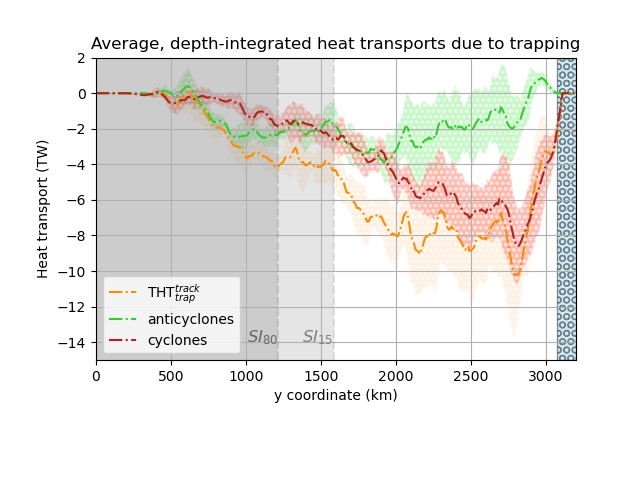

In [6]:
fig, ax = plt.subplots(1)

HT.THTtrap.plot(label="THT$_{trap}^{track}$", color="darkorange", ls="-.")
ax.fill_between(HT.YG, THTtrapminusSTD, THTtrapplusSTD, fc="bisque", ec="w", hatch="ooo", alpha=0.5)

HT.THTtrap_anticyclones.plot(label="anticyclones", color="limegreen", ls="-.")
ax.fill_between(HT.YG, THTtrap_anticyclonesminusSTD, THTtrap_anticyclonesplusSTD, fc="lightgreen", ec="w", hatch="ooo", alpha=0.5)

HT.THTtrap_cyclones.plot(label="cyclones", color="firebrick", ls="-.")
ax.fill_between(HT.YG, THTtrap_cyclonesminusSTD, THTtrap_cyclonesplusSTD, fc="salmon", ec="w", hatch="ooo", alpha=0.5)

plt.legend(loc=3)
plt.grid()
plt.title("Average, depth-integrated heat transports due to trapping")
plt.ylabel("Heat transport (TW)")
plt.xticks(np.arange(0, 3.2e6, 0.5e6), np.arange(0, 3200, 500))
plt.xlabel("y coordinate (km)")
plt.xlim(0, 3.2e6)
plt.ylim(-15, 2)

ax.vlines(SIedge15, -15, 2,  colors='gray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -15), SIedge15, 17, alpha=0.2, facecolor="gray", edgecolor=None))
ax.text(SIedge15, -14, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax.vlines(SIedge80, -15, 2,  colors='dimgray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -15), SIedge80, 17, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax.text(SIedge80, -14, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax.add_patch(Rectangle((3.07e6, -15), 0.13e6, 17, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

plt.subplots_adjust(left=0.15)

plt.subplots_adjust(bottom=0.25)

plt.savefig("figS05-trapping_anticyclones_cyclones.png", dpi=300)